In [41]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from pprint import pprint

# merge frame

In [2]:
raw = pd.read_csv('ph_raw_header.csv', encoding='utf-8')
raw.columns = raw.columns.str.strip()
raw.drop(['appl_no'], axis=1, inplace=True)
raw.head()

D:\Programs\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,acct_no,loan_amt,loan_date,left_fee_total,ln_term,overdue_days,acct_type,cl_date,cl_amt,cl_bal,...,o1_type,other_income,r1_rights,sex,spouse_name,s_type,appl_term,branch,region,group_result
0,9409051021567-001,60000,2011/12/1,55532.16,36,1368,NEW,2014/3/24,NaN,NaN,...,5.0,10000.0,1.0,M,NaN,3.0,NaN,Shanghai,EAST,20
1,9409051022201-001,80000,2011/11/23,228774.10,36,2017,NEW,2012/6/12,NaN,NaN,...,5.0,0.0,1.0,F,NaN,4.0,NaN,Shanghai,EAST,20
2,9409051022842-001,80000,2011/12/6,178561.30,36,1820,NEW,2012/12/25,NaN,NaN,...,6.0,20000.0,2.0,M,NaN,4.0,NaN,Shanghai,EAST,20
3,9409051023044-001,70000,2011/12/7,75733.24,36,1423,NEW,2014/1/26,NaN,NaN,...,6.0,0.0,2.0,M,NaN,3.0,NaN,Shanghai,EAST,20
4,9409051023650-001,80000,2011/12/16,134548.19,36,1628,NEW,2013/7/5,NaN,NaN,...,6.0,0.0,1.0,M,NaN,4.0,NaN,Shanghai,EAST,20


In [3]:
label = pd.read_csv('ph_label.csv', encoding='gbk')
raw.columns = raw.columns.str.strip()
label.head()

,APPL_NO,acct_no,sign
0,001400100617,9401051006790-001,没有诉讼也没有还款的
1,010102100016,0101021000011-001,没有诉讼也没有还款的
2,010102100091,0101021000118-001,没有诉讼也没有还款的
3,010102100160,0101021000249-001,没有诉讼但是有还款的
4,010102100162,0101021000150-001,没有诉讼也没有还款的


In [5]:
new_frame = raw.merge(label, on='acct_no')

In [6]:
new_frame.to_csv('total_col.csv', encoding='utf-8', index=False)

# data analysis

In [27]:
frame = pd.read_csv('total_col.csv', encoding='utf-8')
frame.rename(columns={'APPL_NO': 'appl_no'}, inplace=True)
appl_no = frame.pop('appl_no')
frame.insert(0, appl_no.name, appl_no)
del appl_no
frame.head()

D:\Programs\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appl_no,acct_no,loan_amt,loan_date,left_fee_total,ln_term,overdue_days,acct_type,cl_date,cl_amt,...,other_income,r1_rights,sex,spouse_name,s_type,appl_term,branch,region,group_result,sign
0,940905106608,9409051021567-001,60000,2011/12/1,55532.16,36,1368,NEW,2014/3/24,NaN,...,10000.0,1.0,M,NaN,3.0,NaN,Shanghai,EAST,20,没有诉讼也没有还款的
1,940905106838,9409051022201-001,80000,2011/11/23,228774.10,36,2017,NEW,2012/6/12,NaN,...,0.0,1.0,F,NaN,4.0,NaN,Shanghai,EAST,20,没有诉讼也没有还款的
2,940905107147,9409051022842-001,80000,2011/12/6,178561.30,36,1820,NEW,2012/12/25,NaN,...,20000.0,2.0,M,NaN,4.0,NaN,Shanghai,EAST,20,没有诉讼也没有还款的
3,940905107185,9409051023044-001,70000,2011/12/7,75733.24,36,1423,NEW,2014/1/26,NaN,...,0.0,2.0,M,NaN,3.0,NaN,Shanghai,EAST,20,没有诉讼也没有还款的
4,940905107350,9409051023650-001,80000,2011/12/16,134548.19,36,1628,NEW,2013/7/5,NaN,...,0.0,1.0,M,NaN,4.0,NaN,Shanghai,EAST,20,没有诉讼也没有还款的


In [28]:
# na ratio
def na_ratio(series):
    if series.nunique() <= 20:
        print('Unique units: ' + str(series.unique()))
    empty = series.isnull().sum()
    total = len(series)
    print('NA count: ' +  str(empty))
    print('NA rate: ' + str(np.divide(empty, total)))

In [29]:
for col in frame.columns:
    print('col name: ' + str(col))
    na_ratio(frame[col])
    print('\n')

col name: appl_no
NA count: 0
NA rate: 0.0


col name: acct_no
NA count: 0
NA rate: 0.0


col name: loan_amt
NA count: 0
NA rate: 0.0


col name: loan_date
NA count: 0
NA rate: 0.0


col name: left_fee_total
NA count: 0
NA rate: 0.0


col name: ln_term
Unique units: [36 24 12 18 35 11 10]
NA count: 0
NA rate: 0.0


col name: overdue_days
NA count: 0
NA rate: 0.0


col name: acct_type
Unique units: ['NEW' 'RIN' 'REF']
NA count: 0
NA rate: 0.0


col name: cl_date
NA count: 0
NA rate: 0.0


col name: cl_amt
NA count: 314975
NA rate: 0.9505580067479886


col name: cl_bal
NA count: 314975
NA rate: 0.9505580067479886


col name: paid_term
NA count: 0
NA rate: 0.0


col name: left_bal
NA count: 0
NA rate: 0.0


col name: seg_new
Unique units: ['1house_owner' 'other' '2salaried_loan' '3car_Owner']
NA count: 0
NA rate: 0.0


col name: rec_amt_his
NA count: 135
NA rate: 0.0004074143373632144


col name: m1_rec
NA count: 135
NA rate: 0.0004074143373632144


col name: m2_rec
NA count: 135
NA rate:

In [7]:
frame['sign'].value_counts()

没有诉讼也没有还款的    286450
没有诉讼但是有还款的     44175
发起诉讼后仍未还款的       711
发起诉讼后还款的          22
Name: sign, dtype: int64

In [8]:
frame['group_result'].value_counts()

20    287232
10     44126
Name: group_result, dtype: int64

In [22]:
frame[['basic_salary', 'monthly_income', 'annual_salary', 'other_income', 'check_income']].corr()

,basic_salary,monthly_income,annual_salary,other_income,check_income
basic_salary,1.000000,0.965935,0.890136,0.438389,0.606670
monthly_income,0.965935,1.000000,0.916158,0.656042,0.633898
annual_salary,0.890136,0.916158,1.000000,0.582614,0.557585
other_income,0.438389,0.656042,0.582614,1.000000,0.432144
check_income,0.606670,0.633898,0.557585,0.432144,1.000000


# clean data

In [30]:
# drop na col
new_frame = frame.drop(labels=['cl_amt', 'cl_bal', 'appl_amt', 'cust_name', 'mobile', 'spouse_name', 'appl_term'], axis=1)
# drop dup
new_frame = new_frame.drop(labels=['cl_date', 'group_result', 'appl_date'], axis=1)

In [31]:
def law_label(cell):
    if cell == '没有诉讼但是有还款的':
        return 0
    else:
        return 1

In [32]:
new_frame['law_label'] = new_frame['sign'].apply(law_label)
new_frame = new_frame.drop(labels=['sign'], axis=1)

In [33]:
def pay_by_clean(cell):
    if isinstance(cell, str):
        return cell
    else:
        return str(int(cell))

def fill_na(name):
    num_col = ['rec_amt_his', 'm1_rec', 'm2_rec', 'm3_rec', 'm4_rec', 'm5_rec', 'm6_rec', 'annual_salary', 'basic_salary', 'age', 
               'check_income', 'monthly_income', 'service_year', 'other_income']
    txt_col = ['education', 'hascar', 'marital_status', 'o1_industry', 'o1_type', 'r1_rights', 'sex', 's_type']
    # deal with aware_loan, pay_by in separate way
    if name in num_col:
        new_frame[name] = new_frame[name].fillna(-1)
    elif name in txt_col:
        new_frame[name] = new_frame[name].fillna('unknown')
    elif name == 'aware_loan':
        new_frame[name] = new_frame[name].replace(0, 'N')
        new_frame[name] = new_frame[name].fillna('unknown')
    elif name == 'pay_by':
        new_frame[name] = new_frame[name].fillna('unknown')
        new_frame[name] = new_frame[name].apply(pay_by_clean)

In [34]:
for col in new_frame:
    fill_na(col)

print('finish.')

finish.


In [35]:
new_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331358 entries, 0 to 331357
Data columns (total 38 columns):
appl_no           331358 non-null object
acct_no           331358 non-null object
loan_amt          331358 non-null int64
loan_date         331358 non-null object
left_fee_total    331358 non-null float64
ln_term           331358 non-null int64
overdue_days      331358 non-null int64
acct_type         331358 non-null object
paid_term         331358 non-null int64
left_bal          331358 non-null int64
seg_new           331358 non-null object
rec_amt_his       331358 non-null float64
m1_rec            331358 non-null float64
m2_rec            331358 non-null float64
m3_rec            331358 non-null float64
m4_rec            331358 non-null float64
m5_rec            331358 non-null float64
m6_rec            331358 non-null float64
annual_salary     331358 non-null float64
aware_loan        331358 non-null object
basic_salary      331358 non-null float64
age               33135

In [36]:
new_frame.to_csv('cleaned_col.csv', encoding='utf-8', index=False)

# label encoding

In [51]:
frame = pd.read_csv('cleaned_col.csv', encoding='utf-8')
frame.head()

,appl_no,acct_no,loan_amt,loan_date,left_fee_total,ln_term,overdue_days,acct_type,paid_term,left_bal,...,o1_industry,service_year,o1_type,other_income,r1_rights,sex,s_type,branch,region,law_label
0,940905106608,9409051021567-001,60000,2011/12/1,55532.16,36,1368,NEW,24,21790,...,1103.0,7.0,5.0,10000.0,1.0,M,3.0,Shanghai,EAST,1
1,940905106838,9409051022201-001,80000,2011/11/23,228774.10,36,2017,NEW,3,74150,...,1103.0,9.0,5.0,0.0,1.0,F,4.0,Shanghai,EAST,1
2,940905107147,9409051022842-001,80000,2011/12/6,178561.30,36,1820,NEW,9,62036,...,1006.0,7.0,6.0,20000.0,2.0,M,4.0,Shanghai,EAST,1
3,940905107185,9409051023044-001,70000,2011/12/7,75733.24,36,1423,NEW,22,29451,...,809.0,9.0,6.0,0.0,2.0,M,3.0,Shanghai,EAST,1
4,940905107350,9409051023650-001,80000,2011/12/16,134548.19,36,1628,NEW,15,49306,...,301.0,8.0,6.0,0.0,1.0,M,4.0,Shanghai,EAST,1


In [52]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331358 entries, 0 to 331357
Data columns (total 38 columns):
appl_no           331358 non-null object
acct_no           331358 non-null object
loan_amt          331358 non-null int64
loan_date         331358 non-null object
left_fee_total    331358 non-null float64
ln_term           331358 non-null int64
overdue_days      331358 non-null int64
acct_type         331358 non-null object
paid_term         331358 non-null int64
left_bal          331358 non-null int64
seg_new           331358 non-null object
rec_amt_his       331358 non-null float64
m1_rec            331358 non-null float64
m2_rec            331358 non-null float64
m3_rec            331358 non-null float64
m4_rec            331358 non-null float64
m5_rec            331358 non-null float64
m6_rec            331358 non-null float64
annual_salary     331358 non-null float64
aware_loan        331358 non-null object
basic_salary      331358 non-null float64
age               33135

In [55]:
def label_encode(name):
    trans_col = ['acct_type', 'seg_new', 'aware_loan', 'education', 'hascar', 'marital_status', 'pay_by', 'o1_industry', 'o1_type', 
                 'r1_rights', 'sex', 's_type', 'branch', 'region']
    le = LabelEncoder()
    if name in trans_col:
        frame[name] = le.fit_transform(frame[name])
        
        keys = le.classes_
        values = le.transform(le.classes_)
        trans_dict = dict(zip(keys, values))
        print('col_name: ' + name)
        pprint(trans_dict)
        print('\n')

In [56]:
for col in frame.columns:
    label_encode(col)

col_name: acct_type
{'NEW': 0, 'REF': 1, 'RIN': 2}


col_name: seg_new
{'1house_owner': 0, '2salaried_loan': 1, '3car_Owner': 2, 'other': 3}


col_name: aware_loan
{'0': 0, 'N': 1, 'Y': 2, 'unknown': 3}


col_name: education
{'3.0': 0, '4.0': 1, '5.0': 2, '6.0': 3, '7.0': 4, '8.0': 5, 'unknown': 6}


col_name: hascar
{'0.0': 0, '1.0': 1, 'unknown': 2}


col_name: marital_status
{'1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, 'unknown': 5}


col_name: pay_by
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, 'BD': 6, 'CF': 7, 'unknown': 8}


col_name: o1_industry
{'1001.0': 0,
 '1002.0': 1,
 '1003.0': 2,
 '1004.0': 3,
 '1005.0': 4,
 '1006.0': 5,
 '101.0': 6,
 '102.0': 7,
 '103.0': 8,
 '104.0': 9,
 '105.0': 10,
 '106.0': 11,
 '107.0': 12,
 '108.0': 13,
 '109.0': 14,
 '110.0': 15,
 '1101.0': 16,
 '1102.0': 17,
 '1103.0': 18,
 '1104.0': 19,
 '1105.0': 20,
 '1106.0': 21,
 '1107.0': 22,
 '1108.0': 23,
 '111.0': 24,
 '112.0': 25,
 '113.0': 26,
 '1201.0': 27,
 '1202.0': 28,
 '1203.0': 29,
 '1

In [57]:
frame.to_csv('ready_col.csv', encoding='utf-8', index=False)

# models

In [108]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [99]:
frame = pd.read_csv('ready_col.csv', encoding='utf-8', parse_dates=['loan_date'])

frame['loan_year'] = frame['loan_date'].dt.year
frame['loan_month'] =frame['loan_date'].dt.month
frame['loan_day'] =frame['loan_date'].dt.day

frame.drop(labels=['appl_no', 'acct_no', 'loan_date'], axis=1, inplace=True)
frame.head()

,loan_amt,left_fee_total,ln_term,overdue_days,acct_type,paid_term,left_bal,seg_new,rec_amt_his,m1_rec,...,other_income,r1_rights,sex,s_type,branch,region,law_label,loan_year,loan_month,loan_day
0,60000,55532.16,36,1368,0,24,21790,0,73172.95,0.0,...,10000.0,0,1,2,26,0,1,2011,12,1
1,80000,228774.10,36,2017,0,3,74150,0,11704.18,0.0,...,0.0,0,0,3,26,0,1,2011,11,23
2,80000,178561.30,36,1820,0,9,62036,0,38389.62,0.0,...,20000.0,1,1,3,26,0,1,2011,12,6
3,70000,75733.24,36,1423,0,22,29451,0,78281.92,0.0,...,0.0,1,1,2,26,0,1,2011,12,7
4,80000,134548.19,36,1628,0,15,49306,0,61186.04,0.0,...,0.0,0,1,3,26,0,1,2011,12,16


In [100]:
law = frame[frame['law_label'] == 1]
nolaw = frame[frame['law_label'] == 0]

In [101]:
def get_train_test(law, nolaw):
    law_test = law.sample(frac=0.2, random_state=233)
    law_train = law.drop(labels=law_test.index)
    
    nolaw_test = nolaw.sample(frac=0.2, random_state=233)
    nolaw_train = nolaw.drop(labels=nolaw_test.index)
    
    train = law_train.append(nolaw_train, ignore_index=True)
    test = law_test.append(nolaw_test,ignore_index=True)
    
    return train.loc[:, train.columns != 'law_label'], test.loc[:, train.columns != 'law_label'], train['law_label'], test['law_label']

In [102]:
X_train, X_test, y_train, y_test = get_train_test(law, nolaw)

Best predict score for random state 1: 0.8501521230726858
Best parameter n_estimators: 86


D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\

Best predict score for random state 512: 0.8534874503724112
Best parameter n_estimators: 91


D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\

Best predict score for random state 1024: 0.8515961382220222
Best parameter n_estimators: 91


D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Programs\Anaconda3\envs\py35\lib\

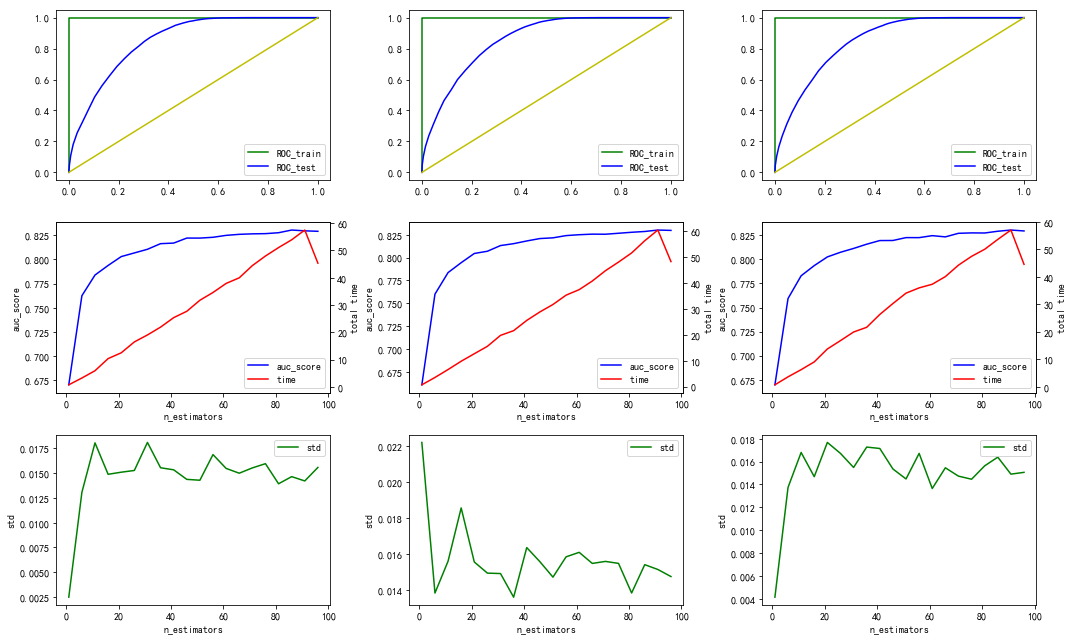

In [109]:
rand = [1, 512, 1024]
fig = plt.figure(figsize=(15, 9), facecolor='w')
for i in range(len(rand)):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand[i])
    rf = RandomForestClassifier(n_jobs=-1)
    parameters = {
        'n_estimators': range(1, 101, 5)
    }
    cv = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', refit=True)
    cv.fit(X_train, y_train)
    print('Best predict score for random state {}: {}'.format(rand[i], cv.score(X_test, y_test)))
    
    tuning_key = 'n_estimators'
    tuning_value = cv.best_params_[tuning_key]
    print('Best parameter {}: {}'.format(tuning_key, tuning_value))
    
    sheet = pd.DataFrame(cv.cv_results_)
    x_label = tuning_key
    x = sheet['param_' + x_label]
    y1 = sheet['mean_test_score']
    y2 = sheet['mean_fit_time'] + sheet['mean_score_time']
    y3 = sheet['std_test_score']
    y1_label = 'auc_score'
    y2_label = 'total time'
    y3_label = 'std'
    # roc curve
    sub_new = 331 + i
    roc_sub = fig.add_subplot(sub_new)
    cur_test = cv.best_estimator_.predict_proba(X_test)
    cur_train = cv.best_estimator_.predict_proba(X_train)
    cur_train = [i[1] for i in cur_train]
    cur_test = [i[1] for i in cur_test]
    rocs_train = sklearn.metrics.roc_curve(y_train, cur_train)
    rocs_test = sklearn.metrics.roc_curve(y_test, cur_test)
    rocs_train_x = np.insert(rocs_train[0], 0, 0)
    rocs_train_y = np.insert(rocs_train[1], 0, 0)
    handle_train, = roc_sub.plot(rocs_train_x, rocs_train_y, 'g', label='ROC_train')
    handle_test, = roc_sub.plot(rocs_test[0], rocs_test[1], 'b', label='ROC_test')
    roc_sub.plot([0,1], [0,1], 'y', label='random')
    plt.legend(handles=[handle_train, handle_test], loc=4, bbox_to_anchor=(1, 0))
    # score and time
    sub_first = 334 + i
    ax1_line1 = fig.add_subplot(sub_first)
    ax2 = ax1_line1.twinx()
    handle2, = ax2.plot(x, y2, 'r', label='time')
    handle1, = ax1_line1.plot(x, y1, 'b', label='auc_score')
    ax1_line1.set_xlabel(x_label)
    ax1_line1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    plt.legend(handles=[handle1, handle2], loc=4, bbox_to_anchor=(1, 0))
    # std
    sub_second = 337 + i
    ax1_line2 = fig.add_subplot(sub_second)
    handle3, = ax1_line2.plot(x, y3, 'g', label='std')
    ax1_line2.set_xlabel(x_label)
    ax1_line2.set_ylabel(y3_label)
    plt.legend(handles=[handle3], loc=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Best predict score for random state 1: 0.8916996283982472
Best parameter max_features: 32
Best predict score for random state 512: 0.8925549076536001
Best parameter max_features: 32
Best predict score for random state 1024: 0.8908828864821838
Best parameter max_features: 32


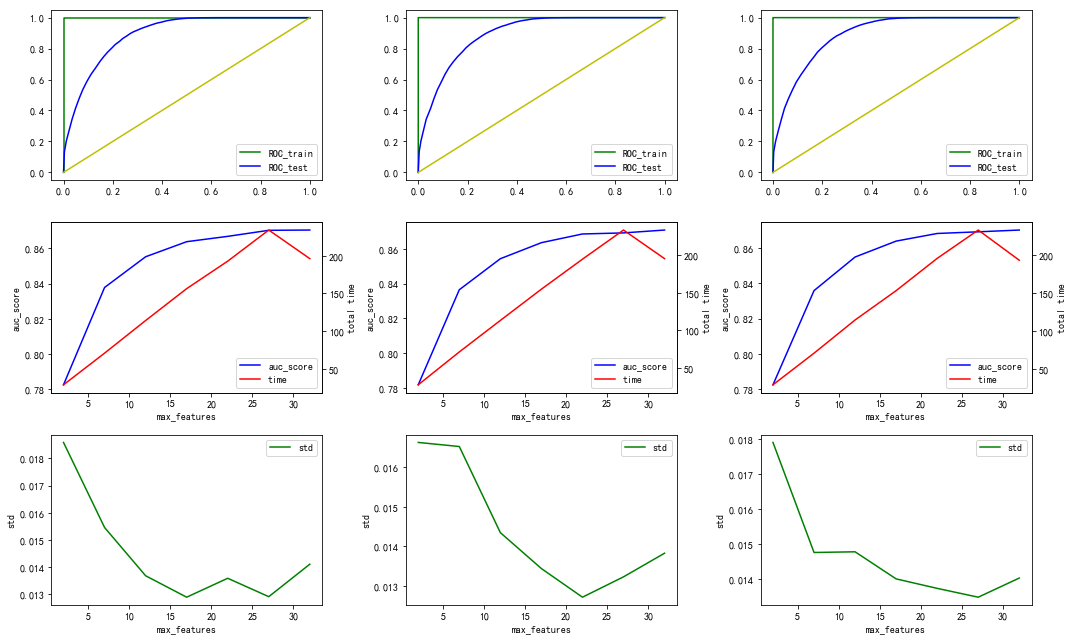

In [112]:
rand = [1, 512, 1024]
fig = plt.figure(figsize=(15, 9), facecolor='w')
for i in range(len(rand)):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand[i])
    rf = RandomForestClassifier(n_jobs=-1)
    parameters = {
        'n_estimators': [100],
        'max_features': range(2, 36, 5)
    }
    
    tuning_key = 'max_features'
    
    cv = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', refit=True, return_train_score=True)
    cv.fit(X_train, y_train)
    print('Best predict score for random state {}: {}'.format(rand[i], cv.score(X_test, y_test)))
    
    tuning_value = cv.best_params_[tuning_key]
    print('Best parameter {}: {}'.format(tuning_key, tuning_value))
    
    sheet = pd.DataFrame(cv.cv_results_)
    x_label = tuning_key
    x = sheet['param_' + x_label]
    y1 = sheet['mean_test_score']
    y2 = sheet['mean_fit_time'] + sheet['mean_score_time']
    y3 = sheet['std_test_score']
    y1_label = 'auc_score'
    y2_label = 'total time'
    y3_label = 'std'
    # roc curve
    sub_new = 331 + i
    roc_sub = fig.add_subplot(sub_new)
    cur_test = cv.best_estimator_.predict_proba(X_test)
    cur_train = cv.best_estimator_.predict_proba(X_train)
    cur_train = [i[1] for i in cur_train]
    cur_test = [i[1] for i in cur_test]
    rocs_train = sklearn.metrics.roc_curve(y_train, cur_train)
    rocs_test = sklearn.metrics.roc_curve(y_test, cur_test)
    rocs_train_x = np.insert(rocs_train[0], 0, 0)
    rocs_train_y = np.insert(rocs_train[1], 0, 0)
    handle_train, = roc_sub.plot(rocs_train_x, rocs_train_y, 'g', label='ROC_train')
    handle_test, = roc_sub.plot(rocs_test[0], rocs_test[1], 'b', label='ROC_test')
    roc_sub.plot([0,1], [0,1], 'y', label='random')
    plt.legend(handles=[handle_train, handle_test], loc=4, bbox_to_anchor=(1, 0))
    # score and time
    sub_first = 334 + i
    ax1_line1 = fig.add_subplot(sub_first)
    ax2 = ax1_line1.twinx()
    handle2, = ax2.plot(x, y2, 'r', label='time')
    handle1, = ax1_line1.plot(x, y1, 'b', label='auc_score')
    ax1_line1.set_xlabel(x_label)
    ax1_line1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    plt.legend(handles=[handle1, handle2], loc=4, bbox_to_anchor=(1, 0))
    # std
    sub_second = 337 + i
    ax1_line2 = fig.add_subplot(sub_second)
    handle3, = ax1_line2.plot(x, y3, 'g', label='std')
    ax1_line2.set_xlabel(x_label)
    ax1_line2.set_ylabel(y3_label)
    plt.legend(handles=[handle3], loc=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Best predict score for random state 1: 0.8914994011449998
Best parameter max_depth: 26
Best predict score for random state 512: 0.8914968423019305
Best parameter max_depth: 31
Best predict score for random state 1024: 0.8902128450000566
Best parameter max_depth: 31


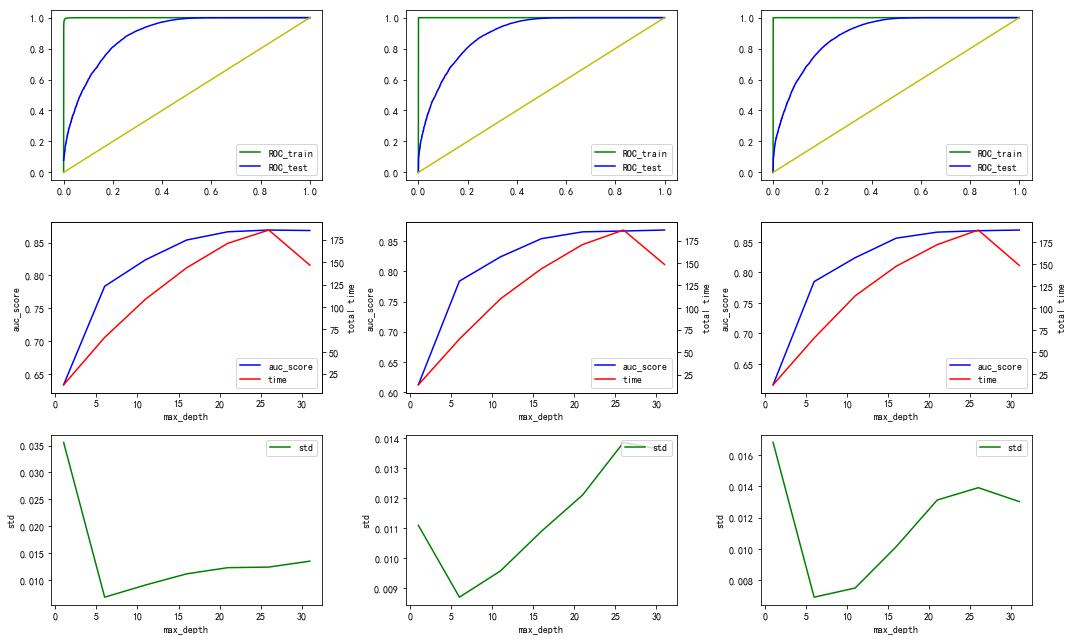

In [113]:
rand = [1, 512, 1024]
fig = plt.figure(figsize=(15, 9), facecolor='w')
for i in range(len(rand)):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand[i])
    rf = RandomForestClassifier(n_jobs=-1)
    parameters = {
        'n_estimators': [100],
        'max_features': [22],
        'max_depth': range(1, 36, 5)
    }
    
    tuning_key = 'max_depth'
    
    cv = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', refit=True, return_train_score=True)
    cv.fit(X_train, y_train)
    print('Best predict score for random state {}: {}'.format(rand[i], cv.score(X_test, y_test)))
    
    tuning_value = cv.best_params_[tuning_key]
    print('Best parameter {}: {}'.format(tuning_key, tuning_value))
    
    sheet = pd.DataFrame(cv.cv_results_)
    x_label = tuning_key
    x = sheet['param_' + x_label]
    y1 = sheet['mean_test_score']
    y2 = sheet['mean_fit_time'] + sheet['mean_score_time']
    y3 = sheet['std_test_score']
    y1_label = 'auc_score'
    y2_label = 'total time'
    y3_label = 'std'
    # roc curve
    sub_new = 331 + i
    roc_sub = fig.add_subplot(sub_new)
    cur_test = cv.best_estimator_.predict_proba(X_test)
    cur_train = cv.best_estimator_.predict_proba(X_train)
    cur_train = [i[1] for i in cur_train]
    cur_test = [i[1] for i in cur_test]
    rocs_train = sklearn.metrics.roc_curve(y_train, cur_train)
    rocs_test = sklearn.metrics.roc_curve(y_test, cur_test)
    rocs_train_x = np.insert(rocs_train[0], 0, 0)
    rocs_train_y = np.insert(rocs_train[1], 0, 0)
    handle_train, = roc_sub.plot(rocs_train_x, rocs_train_y, 'g', label='ROC_train')
    handle_test, = roc_sub.plot(rocs_test[0], rocs_test[1], 'b', label='ROC_test')
    roc_sub.plot([0,1], [0,1], 'y', label='random')
    plt.legend(handles=[handle_train, handle_test], loc=4, bbox_to_anchor=(1, 0))
    # score and time
    sub_first = 334 + i
    ax1_line1 = fig.add_subplot(sub_first)
    ax2 = ax1_line1.twinx()
    handle2, = ax2.plot(x, y2, 'r', label='time')
    handle1, = ax1_line1.plot(x, y1, 'b', label='auc_score')
    ax1_line1.set_xlabel(x_label)
    ax1_line1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    plt.legend(handles=[handle1, handle2], loc=4, bbox_to_anchor=(1, 0))
    # std
    sub_second = 337 + i
    ax1_line2 = fig.add_subplot(sub_second)
    handle3, = ax1_line2.plot(x, y3, 'g', label='std')
    ax1_line2.set_xlabel(x_label)
    ax1_line2.set_ylabel(y3_label)
    plt.legend(handles=[handle3], loc=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

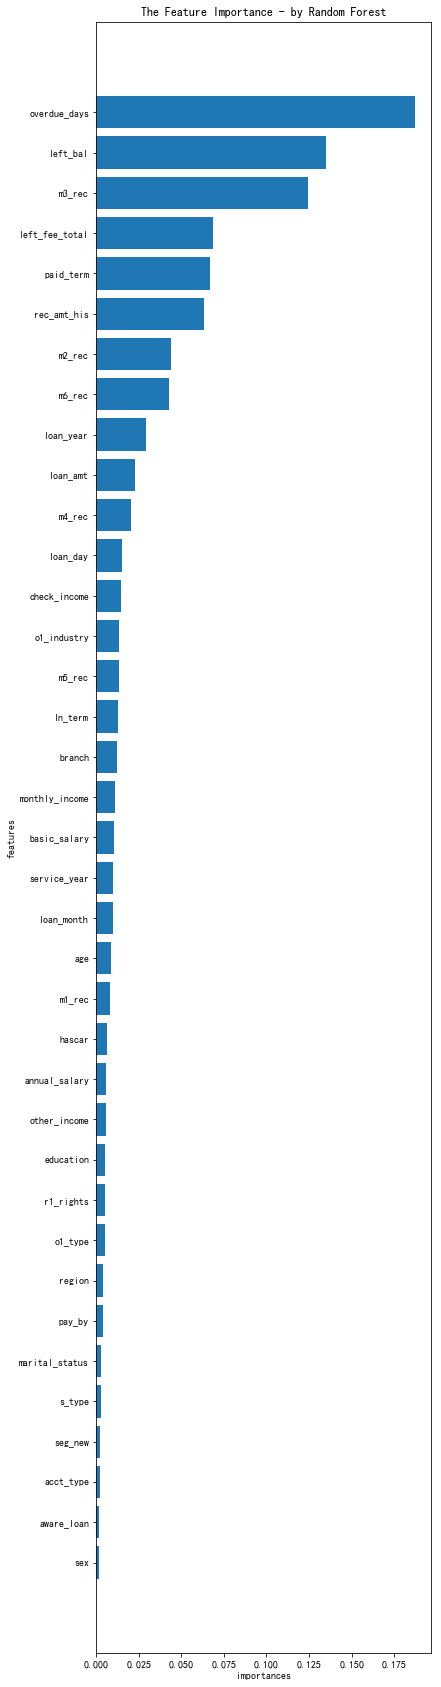

In [114]:
X = frame.loc[:, frame.columns != 'law_label']
y = frame['law_label']
df = RandomForestClassifier(n_estimators=100, max_features=22, max_depth=20)
df.fit(X, y)

features = pd.Series(data=df.feature_importances_, index=X.columns)
features_plot = features.sort_values()

plt.figure(figsize=(6, 30), facecolor='w')
plt.barh(range(len(features_plot)), features_plot)
plt.yticks(range(len(features_plot)), features_plot.index)
plt.ylabel('features')
plt.xlabel('importances')
plt.title('The Feature Importance - by Random Forest')
plt.show()